# Confidence Intervals

## Sampling Distributions

The Bootstrap is a method to approximate the sampling distribution of an arbitrary statistic.  The sampling distribution of a statistic is to be thought of as the collection of statistics you'd have if you repeatedly resampled the population and calculated the statistic of interest on each new sample.  From this collection of resampled statistics we can estimate standard deviation of our estimator.

The plot below attempts to visualize this idea, albeit for a finite number of resamples `R`.  Different from last time we saw a visualization of the sampling distribution, this time we have no data.  By sampling from the (assumed) population, instead of from our original sample, our code is truer to the theory of sampling distributions, although further away from applied statistics.  Compare the code below to the example found in the Section [Normal Distribution](/normal/means#assumed-normality) to see what the difference between resampling from data and resampling from an assumed population looks like in terms of code.

In [8]:
library(ggplot2)

In [9]:
# HIDDEN
update_geom_defaults("point", list(colour = "blue"))
update_geom_defaults("density", list(colour = "blue"))
update_geom_defaults("path", list(colour = "blue"))
old <- theme_set(theme_bw() + theme(text = element_text(size=18)))

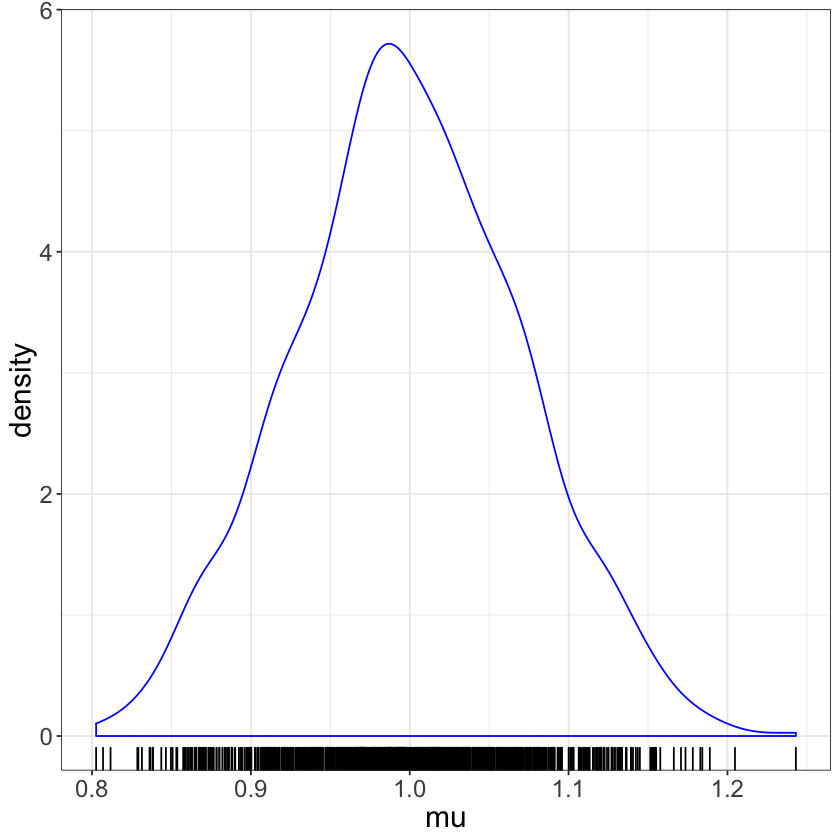

In [10]:
R <- 1001
N <- 99
mus <- rep(NA, R)
for (r in seq_len(R)) {
    mus[r] <- mean(rgamma(N, 2, 2)) # sampling directly from the population, Gamma(2, 2)
}

ggplot(data.frame(mu = mus)) + geom_density(aes(mu)) + geom_rug(aes(mu))

The plot above represents a finite approximation to the sampling distribution of the sample mean coming from a $\text{Gamma}(2, 2)$ population. Despite the fact that a $\text{Gamma}(2, 2)$ probability density function is right skewed, we see that the sampling distribution is shaped like the probability density function for a Normal distribution, centered at $1$ with standard deviation $\mathbb{D}(X)/\sqrt{N} = \left(1/\sqrt{2}\right) / \sqrt{99}$.  The normalization of the sample means, each itself from the Gamma distribution, is due to the Central Limit Theorem.

## Percentiles

Another informative attribute of random variables is the **percentile**.  The $p$% percentile $\pi_p$ puts $p$% of the area under random variable's probability density function to the left of $\pi_p$.  A picture will help.  Consider a standrd normal distribution, where $\pi_{.84} \approx 1$.  Further, $\pi_{0.5} = 0$ for the standard normal distribution since the $\text{Normal}(0, 1)$ distribution is centered at, and perfectly symmetric about, $0$.  The more common name for $pi_{0.5}$ is the median.

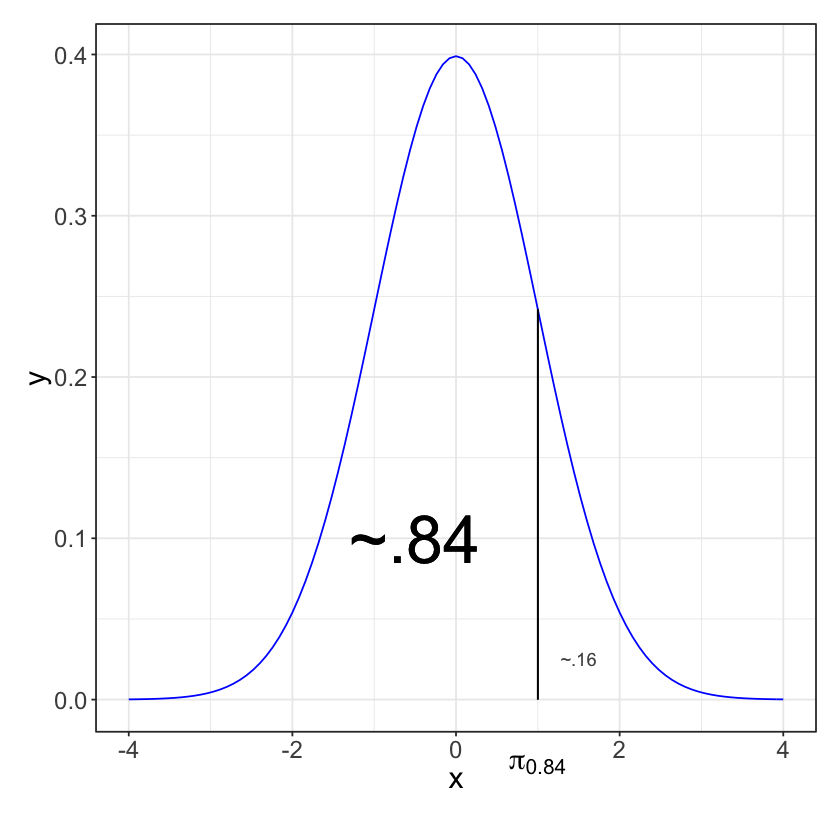

In [11]:
# NO CODE
library(grid)
pip <- textGrob(expression(pi[.84]), gp=gpar(fontsize=18))
ggplot(data.frame(x=c(-4, 4)), aes(x)) + 
    stat_function(fun=dnorm) +
    geom_segment(aes(x=1, xend=1, y=0, yend=dnorm(1))) +
    theme(plot.margin = unit(c(1,1,2,1), "lines")) +
    annotation_custom(pip, xmin=1, xmax=1, ymin=-0.04, ymax=-0.04) +
    geom_text(x=-0.5, y=0.1, label="~.84", size=14) +
    geom_text(x=1.5, y=0.025, label="~.16", alpha=0.5) +
    coord_cartesian(clip = "off")

R will calculate these values for us with the following code.

In [12]:
qnorm(.84)
qnorm(0.5)

[1] 0.9944579

[1] 0

When working with data, instead of a probability density function, find a sample percentile  by first sorting the data into ascending order.  With sorted data, find the value, not necessarily within the dataset, that puts approximately $p$% of the data to the left of the value of interest.  Since R will more often than not do these calculations for us, we just need remember that R will **interpolate** between any two numbers in a dataset so as to best, in some sense, apply the definition of percentile to data.

## Uncertainty in Estimates

We are slowly changing our thinking about the sample mean.  Before this class, most people would think of the sample mean as a single quantity.  Now, we are to think of the sample mean as one of potentially many possible values we could get by resampling the population and performing the same calculation on each new sample.  Each new sample mean would provide a new estimate of the population, but none would be exactly right.  How can we account for the uncertainty in our estimates?

A **confidence interval** is the interval analalogue to the sample mean; a lower and upper bound, two numbers calculated from data used to estimate the population parameter of interest.  The word confidence suggests that we want this random interval to capture the parameter of interest with some sort of degree of accuracy under repeated sampling.

We next blend together the sampling distribution, as estimated by the Bootstrap, together with percentiles to build a confidence interval for a parameter.  Assume you are interested in the mean of the $\text{Gamma}(2, 2)$ distribution above.  Since we know the population parameters $\alpha = 2$ and $\beta = 2$, we could certainly do the math and calculate the mean by hand.  Instead, let's use $\alpha = 2$ and $\beta = 2$ to generate new data, but then pretend we don't know these parameters when calculating a confidence interval.  This will allow us to check our method's accuracy.

Above, we approximated the sampling distribution of the sample mean of a $\text{Gamma}(2, 2)$ distribution by repeatedly resampling from the assumed known population.  Let's take a step closer to applying the Bootstrap and pretend that we have only one sample of data from this $\text{Gamma}(2, 2)$ population.  Then we'll estimate the sampling distribution via Bootstrap. The vector of sample means, `mus`, allows us to estimate two percentiles, $\pi_{0.025}$ and $\pi_{0.975}$.  The estimated percentiles will form our $95$\% confidence interval.

In [18]:
R <- 1001
N <- 99
d <- rgamma(N, 2, 2) # one sample from Gamma(2, 2) population
mus <- rep(NA, R) # preallocate!
for (r in seq_len(R)) {
    idx <- sample(N, N, replace=TRUE) # resample by index
    mus[r] <- mean(d[idx]) # index a vector with a vector and calculate mean
}

ci <- round(quantile(mus, c(0.025, 0.975)), 2)

For me, the interval is $(0.9, 1.1)$. The Bootstrap is inherently a stochastic procedure, so if you rerun the code above you might get slightly different numbers.  Since $\mathbb{E}(X) = \frac{\alpha}{\beta} = 2/2 = 1$, we see that this interval is indeed reasonably accurate.    

Within the framework of the Bootstrap, the only way to increase accuracy is to increase the sample size.  The only way to stabilize the randomness seen by rerunning the code above, and due to the random sampling, is to increase `R`.  Try increasing both `N` and `R` to see the effects.  Pay attention to accuracy, how close the interval is to the true mean $1$, and to the precision, how many decimal places stay the same after each run.  Take care to separate the ideas of accuracy and precision in your mind.

To interpret this interval, we say: *we are $95$% confident that the true population mean is between $.8$ and $1.1$*.  You should memorize the structure of this phrase.  Notice that we used data to make a statement about the population parameter of interest.  This is the crux of statistics: identify a parameter of interest, collect data about it, estimate the parameter, and quantify the uncertainty in your estimate.

If we were to repeat this analysis an infinite number of times, $95$% of the intervals created would include the true population mean.  This is operational definition of the percent confidence.

Remarkably, this procedure guarantees that $95$% of all confidence intervals made will capture the true population mean.  To apply this procedure to real data, we would repeatedly resample, with replacement and with equal probability, from the original dataset.  Next we continue with the example about birth weights of animals from the Order Carnivora found in Section [Assumed Normality](/normal/means#assumed-normality).

### Example

In [19]:
library(dplyr)
carnivora <- read.csv("~/website/app/public/data/carnivora.csv")
d <- carnivora %>%
    select(BW) %>%
    na.omit %>%
    pull(BW) # use dplyr to remove NAs and retreive vector of interest

N <- length(d) # sample size
R <- 1001 # number of resampled datasets
mus <- rep(NA, R) # what shouldn't you forget to do?

for (r in seq_len(R)) {
    idx <- sample(N, N, replace=TRUE) # resample by index
    mus[r] <- mean(d[idx]) # index a vector with a vector and calculate mean
}

ci <- round(quantile(mus, c(0.05, 0.95)), 2) # confidence interval, 90%

We are $90$% confident that the population mean birth weight of animals from the Order Carnivora is between $181$ and $325$ grams.  Again, you might get slightly different numbers if you rerun the code above; increasing `R` should stabilize this issue, at the cost of increasing the computational cost.